In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.ion()

## EWMA

In [2]:
pd.options.display.float_format = '{:.5f}'.format
df = pd.DataFrame()
df['t'] = np.arange(10)
for alpha in np.linspace(0, 1, 10):
    alpha = round(alpha, 2)
    df[f'alpha={alpha}'] = list(reversed([(1 - alpha)**i for i in range(10)]))
df    

,t,alpha=0.0,alpha=0.11,alpha=0.22,alpha=0.33,alpha=0.44,alpha=0.56,alpha=0.67,alpha=0.78,alpha=0.89,alpha=1.0
0,0,1.00000,0.35036,0.10687,0.02721,0.00542,0.00062,0.00005,0.00000,0.00000,0.00000
1,1,1.00000,0.39366,0.13701,0.04061,0.00967,0.00140,0.00014,0.00001,0.00000,0.00000
2,2,1.00000,0.44231,0.17566,0.06061,0.01727,0.00319,0.00043,0.00002,0.00000,0.00000
3,3,1.00000,0.49698,0.22520,0.09046,0.03084,0.00726,0.00129,0.00011,0.00000,0.00000
4,4,1.00000,0.55841,0.28872,0.13501,0.05507,0.01649,0.00391,0.00052,0.00002,0.00000
5,5,1.00000,0.62742,0.37015,0.20151,0.09834,0.03748,0.01186,0.00234,0.00015,0.00000
6,6,1.00000,0.70497,0.47455,0.30076,0.17562,0.08518,0.03594,0.01065,0.00133,0.00000
7,7,1.00000,0.79210,0.60840,0.44890,0.31360,0.19360,0.10890,0.04840,0.01210,0.00000
8,8,1.00000,0.89000,0.78000,0.67000,0.56000,0.44000,0.33000,0.22000,0.11000,0.00000
9,9,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


^Weighted moving average

In [3]:
df = pd.DataFrame()
df['x'] = np.arange(10)
df['ewm(alpha=1)'] = df.x.ewm(alpha=1).mean()
df['ewm(alpha=0)'] = df.x.ewm(alpha=.0000001).mean()
df['ewm(alpha=.8)'] = df.x.ewm(alpha=.8).mean()
df['ewm(alpha=.5)'] = df.x.ewm(alpha=.5).mean()
df['ewm(alpha=.1)'] = df.x.ewm(alpha=.1).mean()
df

,x,ewm(alpha=1),ewm(alpha=0),ewm(alpha=.8),ewm(alpha=.5),ewm(alpha=.1)
0,0,0.00000,0.00000,0.00000,0.00000,0.00000
1,1,1.00000,0.50000,0.83333,0.66667,0.52632
2,2,2.00000,1.00000,1.77419,1.42857,1.07011
3,3,3.00000,1.50000,2.75641,2.26667,1.63129
4,4,4.00000,2.00000,3.75160,3.16129,2.20971
5,5,5.00000,2.50000,4.75038,4.09524,2.80522
6,6,6.00000,3.00000,5.75009,5.05512,3.41759
7,7,7.00000,3.50000,6.75002,6.03137,4.04660
8,8,8.00000,4.00000,7.75000,7.01761,4.69197
9,9,9.00000,4.50000,8.75000,8.00978,5.35340


^ Exponentially weighted moving average at any given point: average of all numbrs coming before.

## Bollinger Bands

In [4]:
# Data + Prep from TS: explore lesson
plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

# T(°F) = T(K) × 9/5 - 459.67
def to_fahrenheit(k):
    return k * 9/5 - 459.67

url = "https://gist.githubusercontent.com/ryanorsinger/0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv"
s = pd.read_csv(url, index_col='datetime', parse_dates=True).temp
s = s.dropna()
s = to_fahrenheit(s)
s = s.resample('D').mean()

In [5]:
s

datetime
2012-10-01   61.33094
2012-10-02   65.67882
2012-10-03   67.41125
2012-10-04   67.70375
2012-10-05   77.07312
               ...   
2017-11-26   65.74475
2017-11-27   62.47475
2017-11-28   63.80277
2017-11-29   64.58000
2017-11-30   65.96600
Freq: D, Name: temp, Length: 1887, dtype: float64

Text(0.5, 0, '')

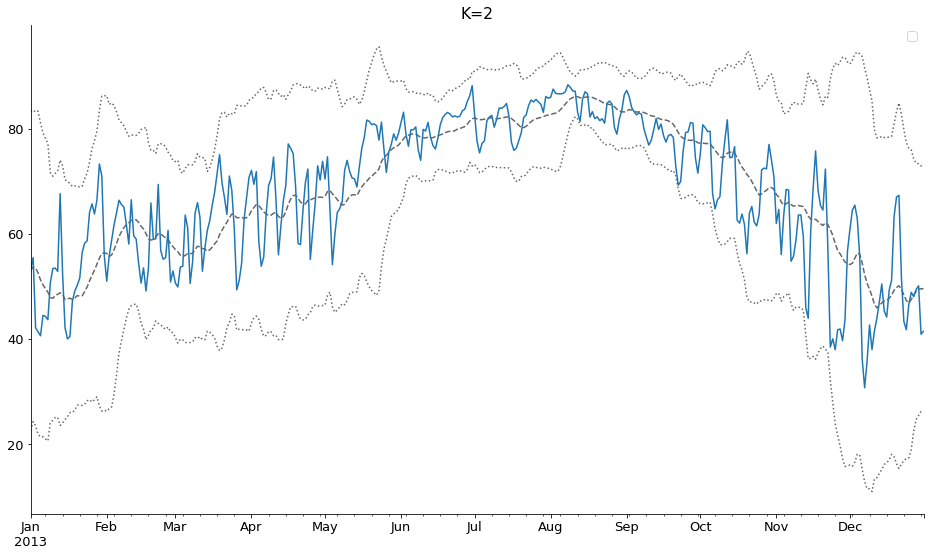

In [14]:
# hyperparameters
K = 3
N = 20

# rolling std
std = s.rolling(N).std()

# dataframe which holds midband, upper band, lower band
bands = pd.DataFrame()
bands['mid'] = s.rolling(N).mean()
bands['upper'] = bands['mid'] + K * std
bands['lower'] = bands['mid'] - K * std
bands['actual'] = s

# fancy plotting code
t = bands.loc['2013']
t[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 9))
t.mid.plot(color='black', alpha=.6, ls='--')
t.actual.plot()
plt.title('K=2')
plt.legend('')
plt.xlabel('')

Text(0.5, 0, '')

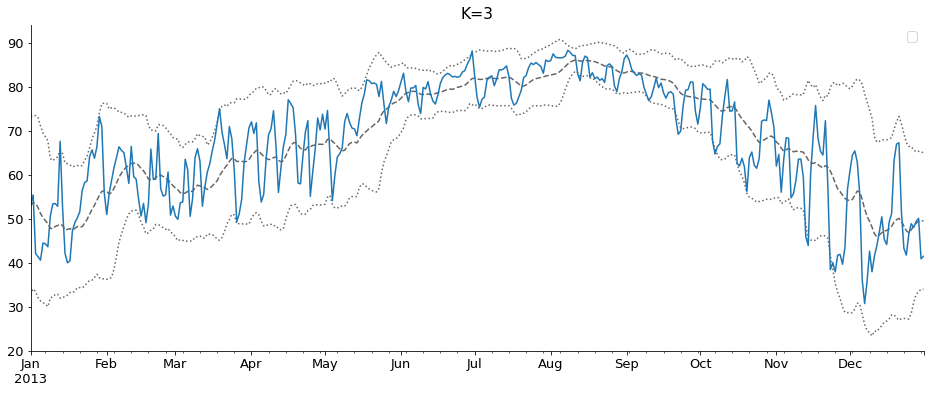

In [15]:
# hyperparameters
K = 2
N = 20

# rolling std
std = s.rolling(N).std()

# dataframe which holds midband, upper band, lower band
bands = pd.DataFrame()
bands['mid'] = s.rolling(N).mean()
bands['upper'] = bands['mid'] + K * std
bands['lower'] = bands['mid'] - K * std
bands['actual'] = s

# fancy plotting code
t = bands.loc['2013']
t[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
t.mid.plot(color='black', alpha=.6, ls='--')
t.actual.plot()
plt.title('K=3')
plt.legend('')
plt.xlabel('')

Text(0.5, 0, '')

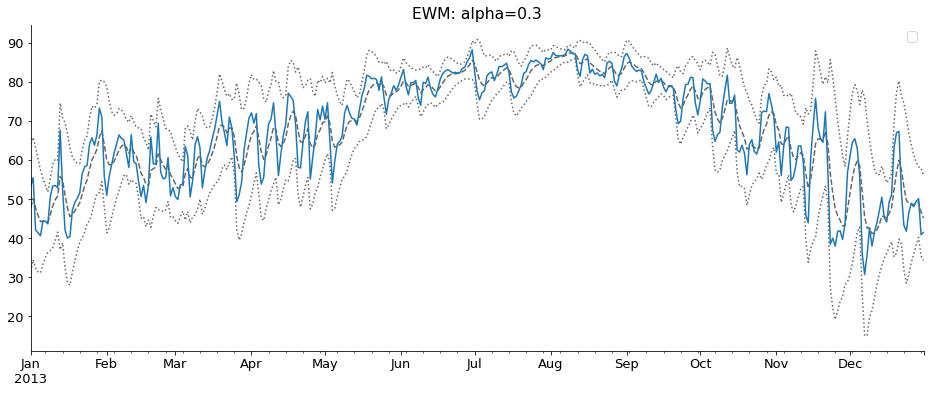

In [17]:
# hyperparameters
K = 2
N = 20

# ewm std
std = s.ewm(alpha=0.3).std()

# dataframe which holds midband, upper band, lower band
bands = pd.DataFrame()
bands['mid'] = s.ewm(alpha=0.3).mean()
bands['upper'] = bands['mid'] + K * std
bands['lower'] = bands['mid'] - K * std
bands['actual'] = s

# fancy plotting code
t = bands.loc['2013']
t[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
t.mid.plot(color='black', alpha=.6, ls='--')
t.actual.plot()
plt.title('EWM: alpha=0.3')
plt.legend('')
plt.xlabel('')

Text(0.5, 0, '')

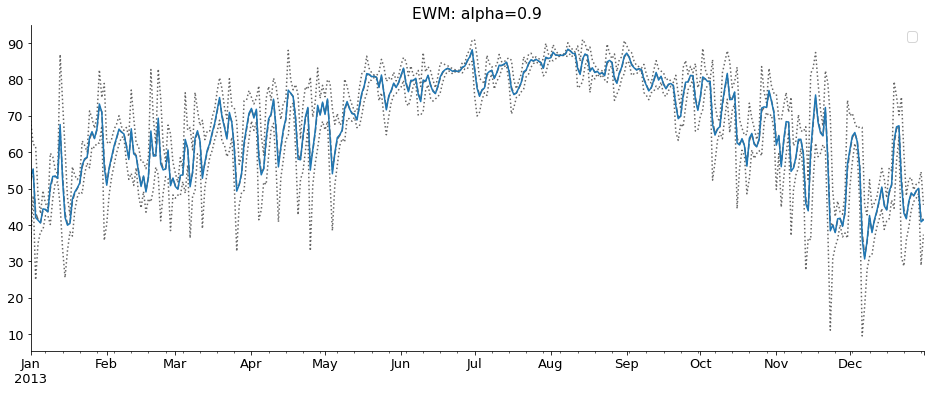

In [18]:
# hyperparameters
K = 2
N = 20

# ewm std
std = s.ewm(alpha=0.9).std()

# dataframe which holds midband, upper band, lower band
bands = pd.DataFrame()
bands['mid'] = s.ewm(alpha=0.9).mean()
bands['upper'] = bands['mid'] + K * std
bands['lower'] = bands['mid'] - K * std
bands['actual'] = s

# fancy plotting code
t = bands.loc['2013']
t[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
t.mid.plot(color='black', alpha=.6, ls='--')
t.actual.plot()
plt.title('EWM: alpha=0.9')
plt.legend('')
plt.xlabel('')

Text(0.5, 0, '')

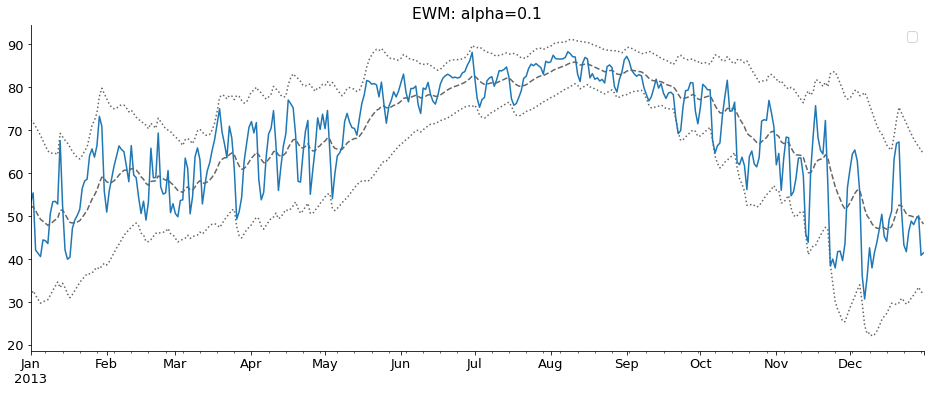

In [19]:
# hyperparameters
K = 2
N = 20

# ewm std
std = s.ewm(alpha=0.1).std()

# dataframe which holds midband, upper band, lower band
bands = pd.DataFrame()
bands['mid'] = s.ewm(alpha=0.1).mean()
bands['upper'] = bands['mid'] + K * std
bands['lower'] = bands['mid'] - K * std
bands['actual'] = s

# fancy plotting code
t = bands.loc['2013']
t[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
t.mid.plot(color='black', alpha=.6, ls='--')
t.actual.plot()
plt.title('EWM: alpha=0.1')
plt.legend('')
plt.xlabel('')

In [20]:
bands['%b'] = (bands.actual - bands.lower) / (bands.upper - bands.lower)

In [21]:
bands

,mid,upper,lower,actual,%b
datetime,,,,,
2012-10-01,61.33094,nan,nan,61.33094,nan
2012-10-02,63.61930,69.76813,57.47047,65.67882,0.66747
2012-10-03,65.01854,71.18874,58.84834,67.41125,0.69389
2012-10-04,65.79935,71.45533,60.14337,67.70375,0.66835
2012-10-05,68.55234,80.41097,56.69372,77.07312,0.85927
...,...,...,...,...,...
2017-11-26,63.12138,79.44846,46.79430,65.74475,0.58034
2017-11-27,63.05672,78.55107,47.56236,62.47475,0.48122
2017-11-28,63.13132,77.83775,48.42489,63.80277,0.52283


In [24]:
upper_outliers = bands[bands['%b'] > 1]

In [25]:
lower_outliers = bands[bands['%b'] < 0]

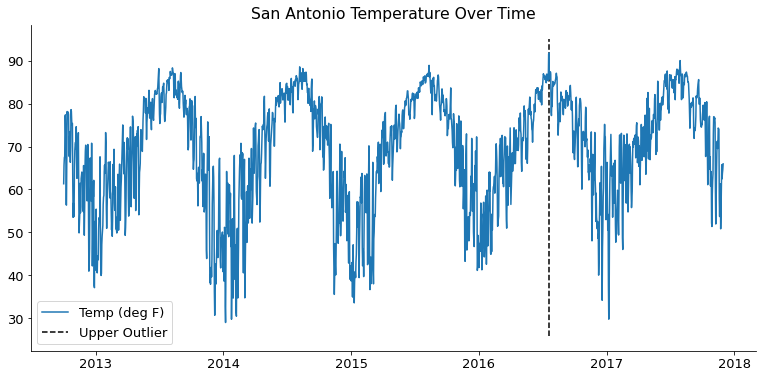

In [34]:
plt.plot(bands.index, bands.actual, label='Temp (deg F)')
plt.vlines(upper_outliers.index, *plt.ylim(), 
           color='black', ls='--', label='Upper Outlier')
plt.title('San Antonio Temperature Over Time')
plt.legend()

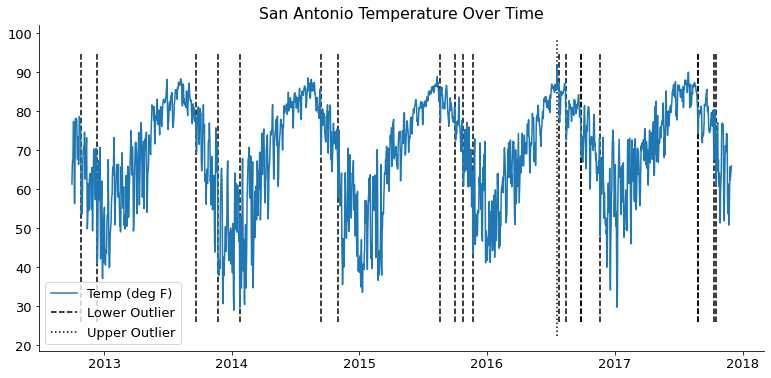

In [39]:
plt.plot(bands.index, bands.actual, label='Temp (deg F)')
plt.vlines(lower_outliers.index, *plt.ylim(), 
           color='black', ls='--', label='Lower Outlier')
plt.vlines(upper_outliers.index, *plt.ylim(), 
           color='black', ls=':', label='Upper Outlier')
plt.title('San Antonio Temperature Over Time')
plt.legend()

# Zoom in to specific time frame
#plt.xlim(pd.to_datetime('2013'), pd.to_datetime('2015'))

How do we deal with dense data?
\
Use less data points!
- consider a broader reasmpling point
- use a subset of the data ("zoom in")
- change the threshold for outlier detection -- in this case a higher 'K' value

"If you torture the data enough it will confess to anything."

- Is this reproducible with new data?
- If my worst enemy read this work, what would they criticize?
- State you hypotheses, biases, and assumptions ahead of time.


## How do we apply this to the project?
- data that is not uniformly frequent
- data that has lots of discrete features

A: We create a continuous variable from the discrete ones by resampling over time.

In [41]:
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
query = 'SELECT * FROM logs'
df = pd.read_sql(query, url)

In [42]:
df

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.00000,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.00000,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.00000,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.00000,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.00000,97.105.19.61
...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.00000,71.150.217.33
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.00000,71.150.217.33
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.00000,71.150.217.33
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.00000,24.160.137.86


In [ ]:
Im choosing to focus on cohort_id

In [46]:
# subset
df = df[df.cohort_id.isin([33, 34, 51])]

In [49]:
df = df.set_index(pd.to_datetime(df.date + ' ' + df.time))

This is **THE SECRET SAUCE**

1. groupby + resample + `size()` gives us counts over time for each unique valueof the discrete var
1. `.unstack(0)` converts the index of the discrete var to columns

we end up with a df where the rows are our chosen time period, cols are unique values of the discrete var, and the values are the number of times that the combination of discrete var + time period shows up (i.e. # of requests per cohort per week)

In [59]:
cohort_reqs = df.groupby('cohort_id').resample('W').size().unstack(0)
cohort_reqs.head()

cohort_id,33.00000,34.00000,51.00000
2019-07-21,2178.00000,nan,nan
2019-07-28,2023.00000,nan,nan
2019-08-04,2244.00000,nan,nan
2019-08-11,2008.00000,nan,nan
2019-08-18,2069.00000,nan,nan


<AxesSubplot:>

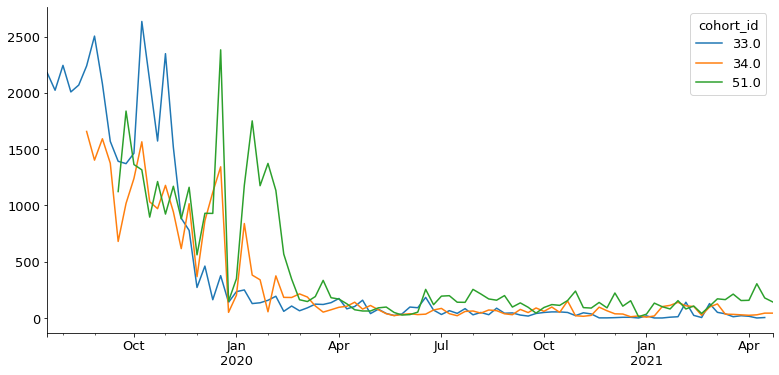

In [60]:
cohort_reqs.plot()

Converted discrete variable to continuous over time with resampling by week and `.size()`

In [65]:
K = 2
N = 5 # 5 week moving average
s = cohort_reqs.iloc[:, 0]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std

bands.head(10)

,actual,mid,upper,lower
2019-07-21,2178.00000,nan,nan,nan
2019-07-28,2023.00000,nan,nan,nan
2019-08-04,2244.00000,nan,nan,nan
2019-08-11,2008.00000,nan,nan,nan
2019-08-18,2069.00000,2104.40000,2309.52728,1899.27272
2019-08-25,2239.00000,2116.60000,2349.05042,1884.14958
2019-09-01,2504.00000,2212.80000,2598.90724,1826.69276
2019-09-08,2081.00000,2180.20000,2580.40345,1779.99655
2019-09-15,1569.00000,2092.40000,2774.69847,1410.10153
2019-09-22,1392.00000,1957.00000,2886.45038,1027.54962


Text(0, 0.5, '# of requests')

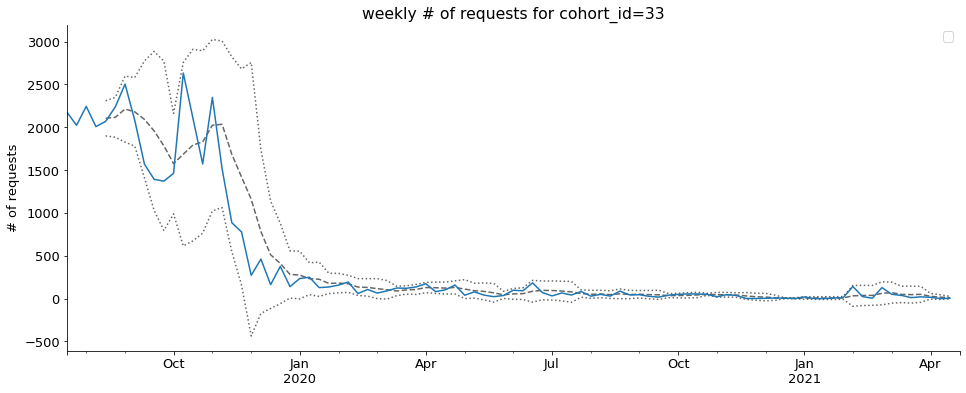

In [70]:
bands[['upper', 'lower']].plot(color='black', 
                               alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort_id=33')
plt.ylabel('# of requests')

**Next steps:**

1. Calculate %b to call out outliers and visualize
1. tweak hyperparameters -- try ewma, diff values for K
1. apply to multiple cohorts or other discrete variables (a function might help)